In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
heart_df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
heart_df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
# Check for missing values in the DataFrame
missing_values = heart_df.isna().sum()
print(missing_values)

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


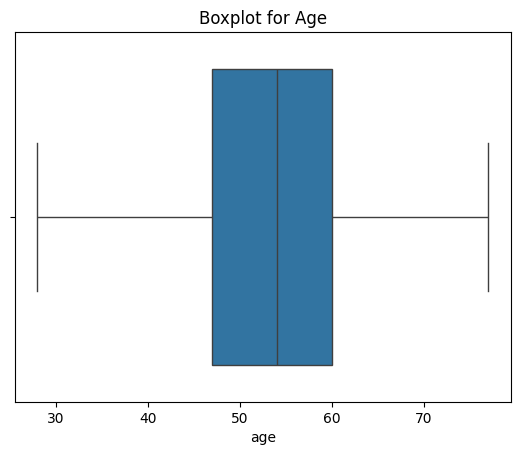

In [4]:
# Handle Outliers
sns.boxplot(x=heart_df['age'])
plt.title('Boxplot for Age')
plt.show()

In [5]:
# Get the Summary Stats
print(heart_df.describe())

               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636     

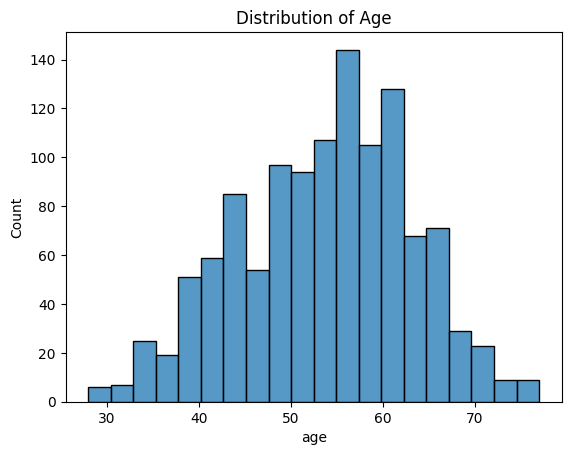

In [6]:
# Visualize the distribution of age
sns.histplot(heart_df['age'])
plt.title('Distribution of Age')
plt.show()

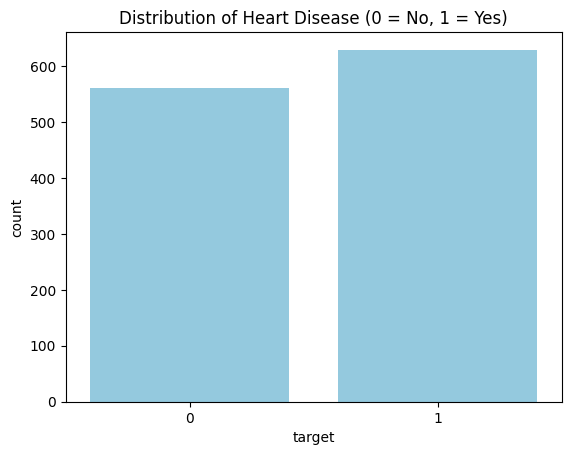

In [7]:
# Distribution of target variable
sns.countplot(x='target', data = heart_df, color='skyblue')
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.show()

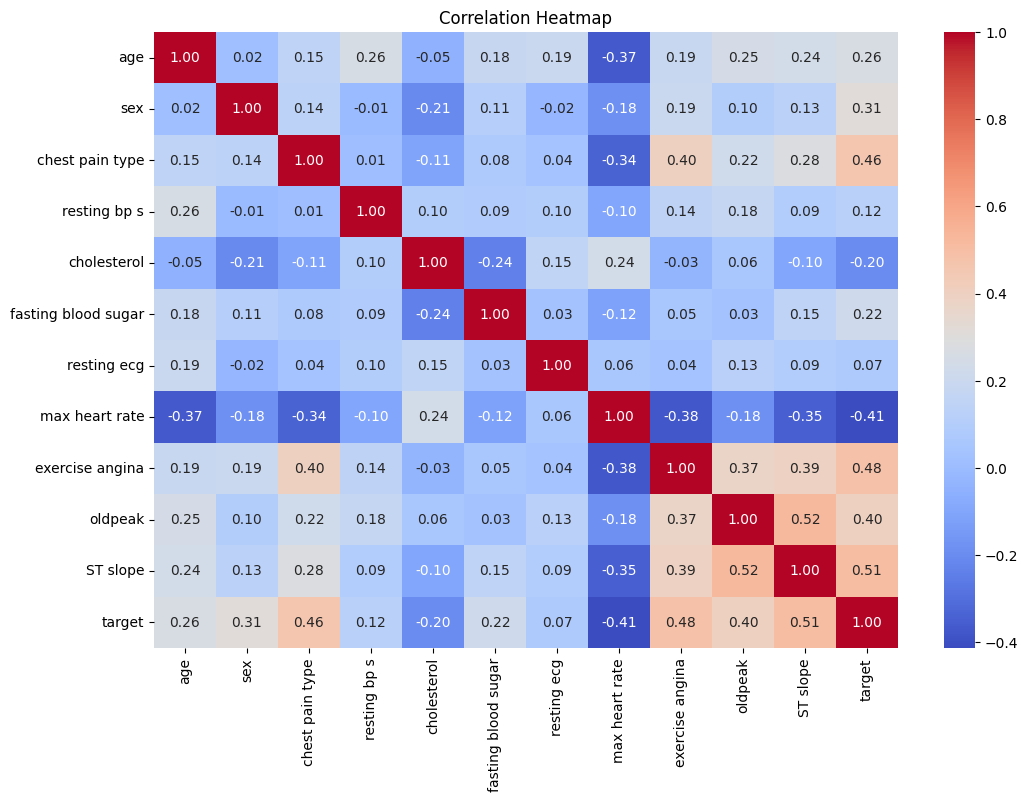

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# # Pairplot for numerical variables
# sns.pairplot(heart_df[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak', 'target']], hue='target')
# plt.show()

C:\Users\saron\AppData\Local\Temp\ipykernel_8276\1253157023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


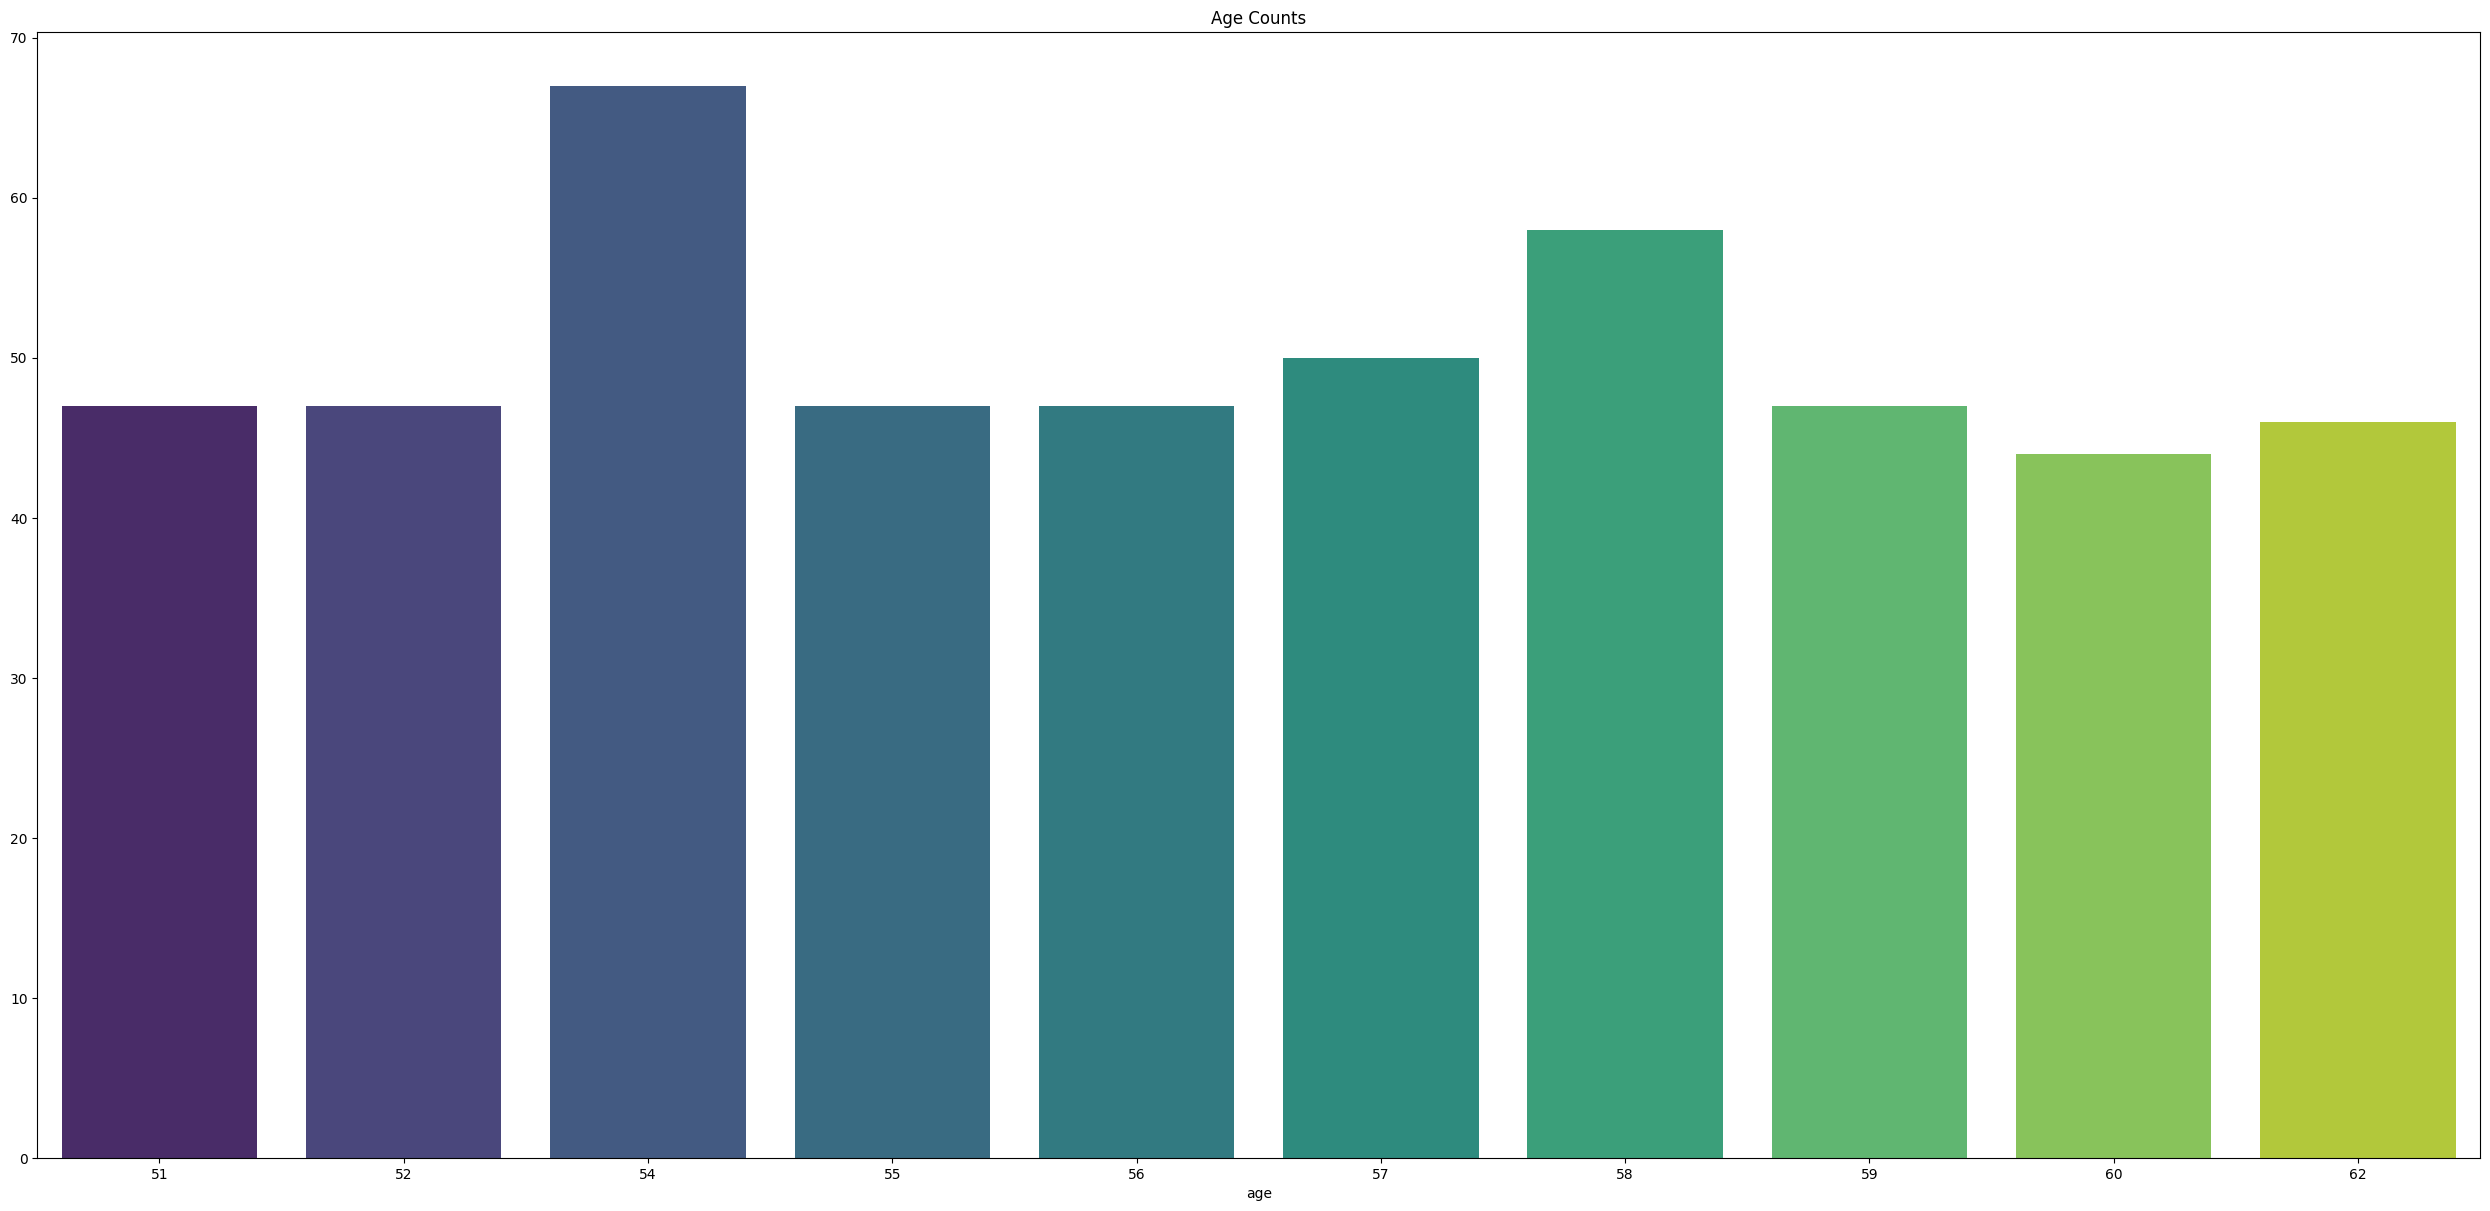

In [10]:
plt.figure(figsize=(25,12)) 
sns.barplot(
    x=heart_df.age.value_counts()[:10].index,
    y=heart_df.age.value_counts()[:10].values,
    palette=sns.color_palette("viridis", 10)  # Custom color palette
)
# Adjust layout to fit
plt.tight_layout()
plt.title('Age Counts')
# Show the plot
plt.show()

In [11]:
# Check the range of age in the dataset
minAge=min(heart_df.age) 
maxAge=max(heart_df.age) 
meanAge=heart_df.age.mean() 
print('Min Age :',minAge) 
print('Max Age :',maxAge) 
print('Mean Age :',meanAge)

Min Age : 28
Max Age : 77
Mean Age : 53.72016806722689


C:\Users\saron\AppData\Local\Temp\ipykernel_8276\4193472259.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: >

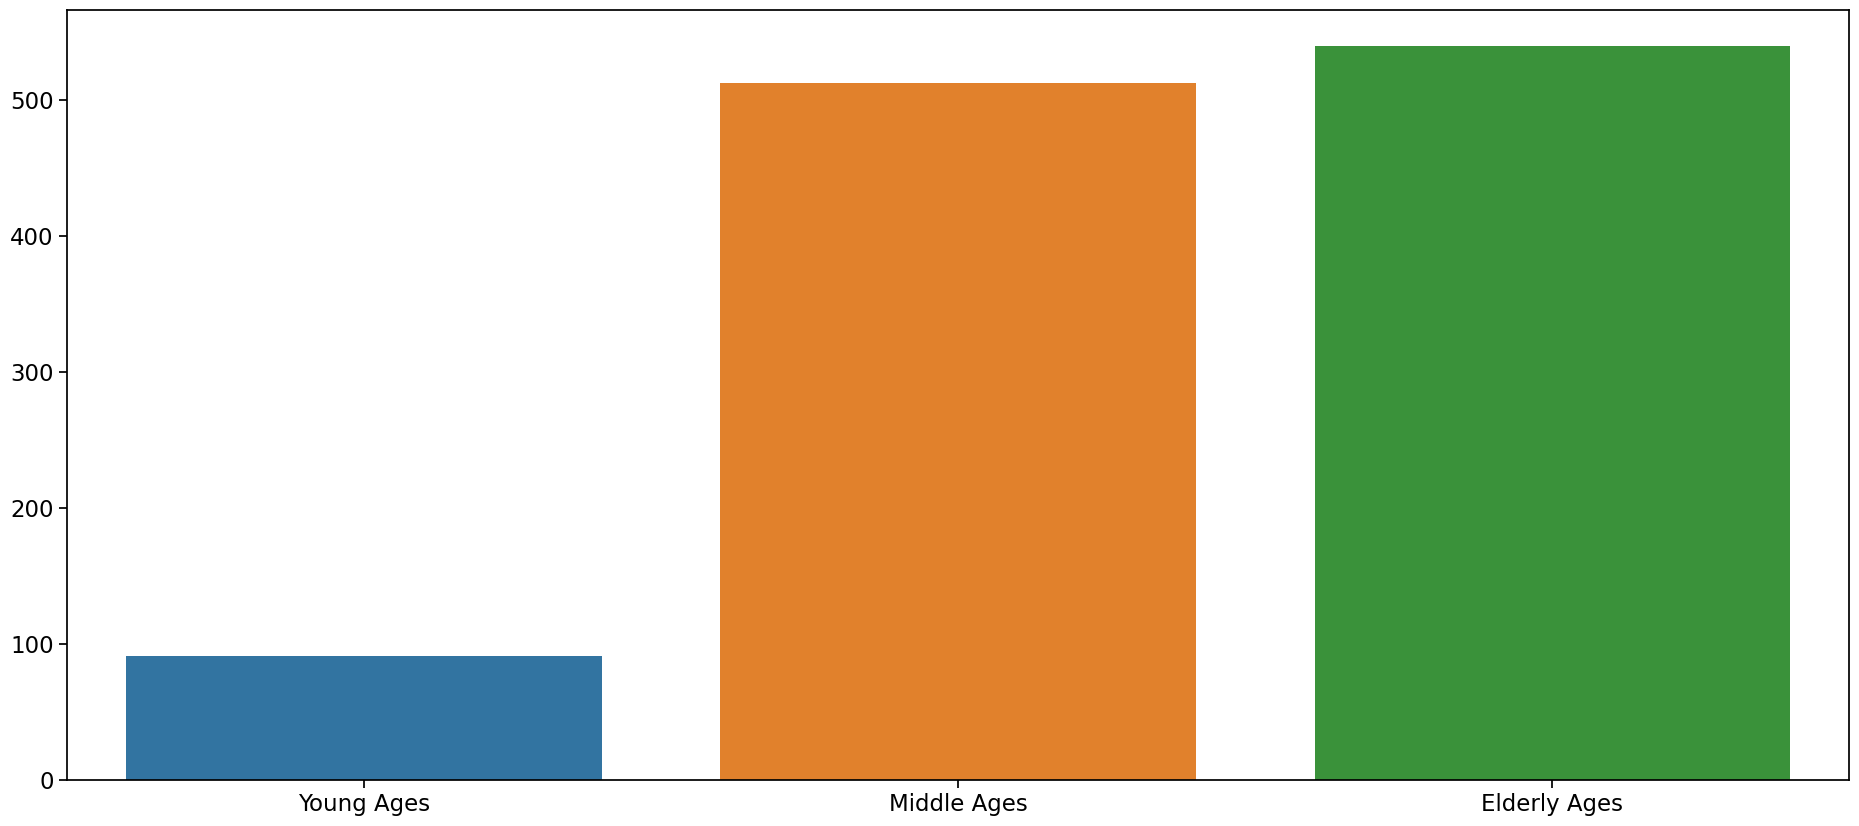

In [12]:
Young = heart_df[(heart_df.age>=29)&(heart_df.age<40)] 
Middle = heart_df[(heart_df.age>=40)&(heart_df.age<55)] 
Elder = heart_df[(heart_df.age>55)] 

# Plot the bar graph
plt.figure(figsize=(23,10)) 
sns.set_context('notebook',font_scale = 1.5) 
sns.barplot(
    x=['Young Ages', 'Middle Ages', 'Elderly Ages'],
    y=[len(Young), len(Middle), len(Elder)],
    palette=['#1f77b4', '#ff7f0e', '#2ca02c']  # Custom colors for the bars
)

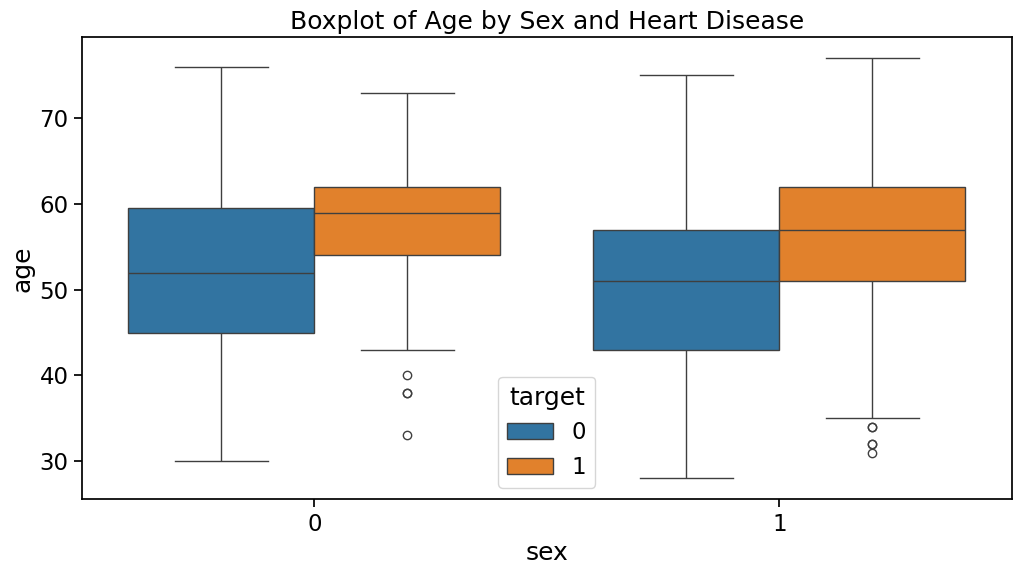

In [13]:
# Boxplot for categorical variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=heart_df, x='sex', y='age', hue='target')
plt.title('Boxplot of Age by Sex and Heart Disease')
plt.show()

In [14]:
# Split the heart_df into features (X) and target variable (y)
X = heart_df.drop(columns=['target'])
y = heart_df['target']

# Split the heart_df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Initialize and train a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Initialize and train Support Vector Machine model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Initialize and train Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set for each model
lr_pred = lr_model.predict(X_test_scaled)
svm_pred = svm_model.predict(X_test_scaled)
dt_pred = dt_model.predict(X_test_scaled)
y_pred = rf_model.predict(X_test_scaled)

# Evaluate each model
models = {"Logistic Regression": lr_pred, 
          "Support Vector Machine": svm_pred, 
          "Decision Tree": dt_pred,
          "Random Forest": y_pred}

for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.8613445378151261
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.87      0.88      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

Confusion Matrix:
[[ 90  17]
 [ 16 115]]

Model: Support Vector Machine
Accuracy: 0.8445378151260504
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       107
           1       0.86      0.86      0.86       131

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238

Confusion Matrix:
[[ 88  19]
 [ 18 113]]

Model: Decision Tree
Accuracy: 0.9033613445378151
Classification Report:
              precision    

In [16]:
# Define the KNN model
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best hyperparameters
param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

c:\program files\python38\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\program files\python38\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

Best hyperparameters: {'n_neighbors': 1}
[[ 81  26]
 [ 29 102]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       107
           1       0.80      0.78      0.79       131

    accuracy                           0.77       238
   macro avg       0.77      0.77      0.77       238
weighted avg       0.77      0.77      0.77       238

Accuracy: 0.7689075630252101


c:\program files\python38\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


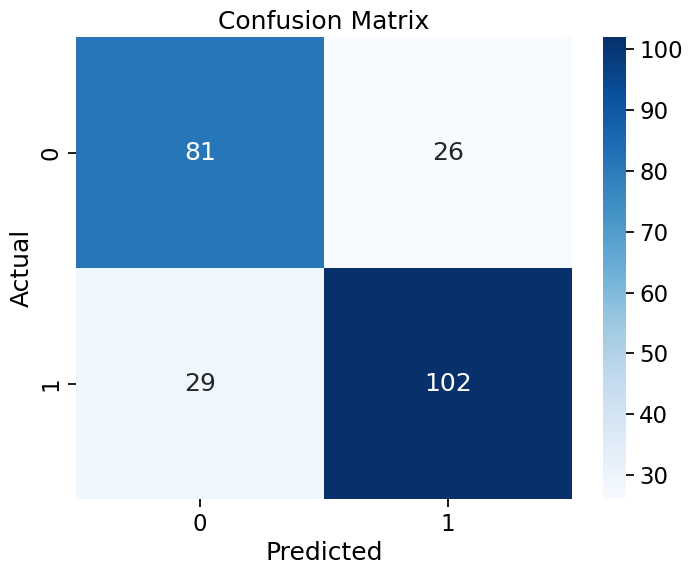

In [17]:
# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Train the KNN model with the best hyperparameters
knn_best = grid_search.best_estimator_
knn_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Visualization: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()